In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
df= pd.read_csv('C:\\Users\\Rija\\SHIFTING\\Kaggle-Brazilian E-Commerce Public Dataset by Olist\\payments_dataset.csv')
df.head()

,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,1,credit_card,1,136.23
1,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,1,credit_card,3,75.06
2,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,1,credit_card,2,40.95
3,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,1,credit_card,1,109.34
4,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,1,boleto,1,45.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103886 non-null  object 
 1   order_status              103886 non-null  object 
 2   order_purchase_timestamp  103886 non-null  object 
 3   payment_sequential        103886 non-null  int64  
 4   payment_type              103886 non-null  object 
 5   payment_installments      103886 non-null  int64  
 6   payment_value             103886 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Check Null Value
df.isna().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
dtype: int64

## Data Manipulation

In [ ]:
# Transform order_purchase _timestamp columns to datetime
df['order_purchase_timestamp']= pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_timestamp'].dtypes

dtype('<M8[ns]')

## EDA

Questions:
1. What type of payment do you use most often?
2. Amount of value transactions for each type of payment?
3. When do customers make transactions ?
4. The percentage of the number of orders that were canceled based on the number of orders?
5. How many customers make installments?

Number of payment_type:
 credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64 

Percentage of payment_type(%):
 credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: payment_type, dtype: float64


<AxesSubplot:>

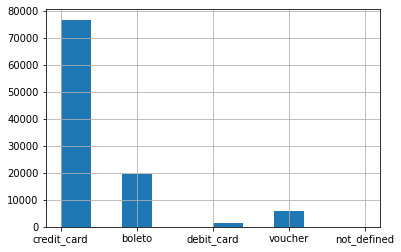

In [ ]:
#1. What type of payment do you use most often?
payments= df['payment_type'].value_counts(ascending= False)
print('Number of payment_type:\n',payments,'\n')

# percentage each payment methode
payments_percentage= round(payments/ sum(payments) * 100, 2)
print('Percentage of payment_type(%):\n',payments_percentage)

#Visualization
df['payment_type'].hist()

Great, the majority of payment methods using credit cards amounted to 76795 (73.92%) of the total order, which means it is very effective to add promotions related to payment methods using credit cards instead of debit cards which only amounted to 1529, less than 2% of total orders. 

In [ ]:
#2. Amount of value transactions for each type of payment?
def compute_percentage(x, axis= 1):
    pct = x/sum(x) * 100
    return round(pct, 2)

trans_value= df.groupby('payment_type')['payment_value'].agg(['count', 'sum']).sort_values(by='sum', ascending= False)
trans_value['percentage_number_payment']= compute_percentage(trans_value['count'])
trans_value['percentage_trans_value']= compute_percentage(trans_value['sum'])
print(trans_value)

              count          sum  percentage_number_payment  \
payment_type                                                  
credit_card   76795  12542084.19                      73.92   
boleto        19784   2869361.27                      19.04   
voucher        5775    379436.87                       5.56   
debit_card     1529    217989.79                       1.47   
not_defined       3         0.00                       0.00   

              percentage_trans_value  
payment_type                          
credit_card                    78.34  
boleto                         17.92  
voucher                         2.37  
debit_card                      1.36  
not_defined                     0.00  


interesting, from the total number of transactions for the most value is still same on the payment method using credit card and the order remains the same, but for the voucher and debit card methods it is found that the difference in the amount of payment value is relatively small compared to the difference in number of payment type use. This means that payments using vouchers are still effective because they are relatively more widely used than debit cards, but the payment value is still not optimal 

order_purchase_timestamp
2016-09       3
2016-10     342
2016-12       1
2017-01     850
2017-02    1886
2017-03    2837
2017-04    2571
2017-05    3944
2017-06    3436
2017-07    4317
2017-08    4550
2017-09    4516
2017-10    4860
2017-11    7863
2017-12    5895
2018-01    7563
2018-02    6952
2018-03    7512
2018-04    7209
2018-05    7135
2018-06    6419
2018-07    6507
2018-08    6698
2018-09      16
2018-10       4
Name: order_id, dtype: int64


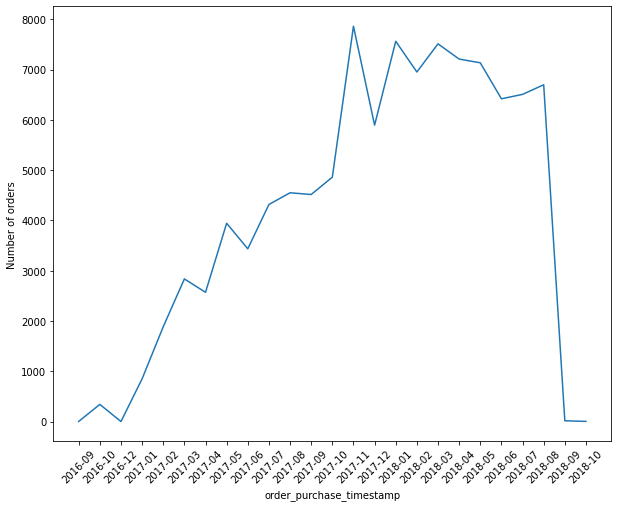

In [ ]:
# 3. When do customers make transactions ?
year= df['order_purchase_timestamp'].dt.year
month= df['order_purchase_timestamp'].dt.month
#monthyear= df['order_purchase_timestamp'].dt.to_period('M')
monthyear= df['order_purchase_timestamp'].dt.strftime('%Y-%m')
purchase_date= df.groupby(monthyear)['order_id'].count()
print(purchase_date)

#visualization based month year
plt.figure(figsize=(10,8))
sns.lineplot(data=purchase_date, x= purchase_date.index, y=purchase_date.values, markers=True)
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.show()

Nice, Data taken from September 2016 to October 2018. The graph shows a positive trend until November 2017 as well as being the month with the highest number of orders (7863) and suddenly fluctuating until August 2018. A drastic decline occurred in September- October 2018. 

order_purchase_timestamp
0     2537
1     1232
2      532
3      281
4      215
5      195
6      514
7     1269
8     3081
9     4954
10    6439
11    6875
12    6332
13    6768
14    6848
15    6684
16    6971
17    6371
18    6049
19    6229
20    6503
21    6526
22    6146
23    4335
Name: order_id, dtype: int64


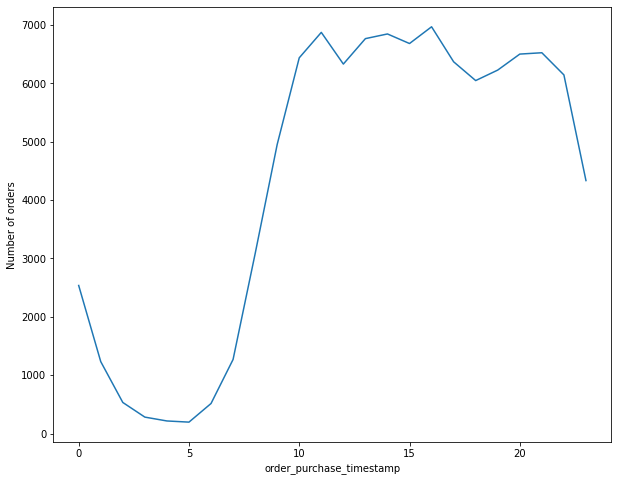

In [ ]:
hour= df['order_purchase_timestamp'].dt.hour
purchase_time= df.groupby(hour)['order_id'].count()
print(purchase_time)

#visualization based Hour
plt.figure(figsize=(10,8))
sns.lineplot(data=purchase_time, x= purchase_time.index, y=purchase_time.values, markers=True)
plt.ylabel('Number of orders')
#plt.xticks(rotation=45)
plt.show()

based on the time the customer makes a payment, if you want to optimize the advertising strategy the right time to place an ad is at 10 am - 5 pm where the peak occurs at 4 pm.

In [ ]:
# 4.The percentage of the number of orders that were canceled based on the number of orders
status= df['order_status'].value_counts(ascending= False)
print(status)

delivered      100756
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64


In [ ]:
canceled= df[df['order_status'] == 'canceled'].value_counts('payment_type')
print(canceled)
compute_percentage(canceled)

payment_type
credit_card    444
voucher        115
boleto          95
debit_card       7
not_defined      3
dtype: int64


payment_type
credit_card    66.87
voucher        17.32
boleto         14.31
debit_card      1.05
not_defined     0.45
dtype: float64

customers with credit card payment methods had the largest percentage of 66.87% (444 of 664). but overall the number of cancels against the number of orders is relatively small (664 of 103886) 

Distribution of Installments: 
 payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: order_id, dtype: int64


<AxesSubplot:>

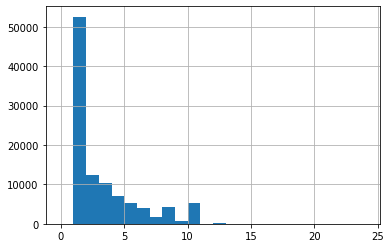

In [ ]:
# 5. How many customers make installments?
installments= df.groupby('payment_installments')['order_id'].count()
print('Distribution of Installments: \n', installments)
df['payment_installments'].hist(bins=24)

As we know,  payment installments is more than once. the histogram graph shows a downtrend from 2 to 7. while at 8 and 10 installments there are relatively more enthusiasts. 